<a href="https://colab.research.google.com/github/TruongScotl/LapTrinhPhanTichDuLieu/blob/main/Laptrinhphantichdulieu_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build model linear regression to predict variable L1 base on L1, L2, L3, L3, L4, L5


1.   Input: L1, L2, L3, L4, L5
2.   Output: L6
3.   Model: L6 = f(L1+L2+L3+L4+L5)
-> L6 = B + L1*A1 + L2*A2 + L3*A3 + L4*A4 + L5*A5 + epsilon


*   Skip multiple variable statis steps





In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/dulieuxettuyendaihoc.csv', header = 0, delimiter = ',')
df.head(5)

,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT
0,1,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,8.9,5.8,9.0,6.6,8.7,7.2,5.8,7.4,7.4,5.2,6.6,6.9,8.9,8.1,5.8,7.2,7.1,5.9,7.2,6.6,5.8,8.1,5.9,7.4,5.6,6.1,5.7,7.9,5.0,7.4,5.0,6.9,5.7,6.5,7.2,8.4,6.6,7.6,5.9,F,NaN,2NT,3.25,3.25,4.50,A1
1,2,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,5.4,3.2,7.2,5.4,6.1,4.7,4.7,4.3,3.8,3.7,3.7,5.2,6.6,5.8,4.4,4.9,2.8,5.1,4.5,5.6,7.0,7.6,4.7,3.0,4.6,4.4,4.9,4.3,6.3,6.7,4.4,4.0,5.4,4.0,5.2,5.5,6.6,6.1,4.4,M,NaN,1,6.00,4.00,3.50,C
2,3,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,4.9,6.2,6.1,5.3,7.1,4.0,4.9,2.8,6.3,6.2,5.6,2.5,5.8,5.1,3.7,6.1,6.1,5.8,6.8,4.0,6.4,5.3,4.1,4.8,5.1,6.4,5.1,4.0,6.9,3.9,3.2,5.7,6.6,6.8,6.8,4.1,7.9,8.1,4.6,M,NaN,1,5.00,6.75,4.00,C
3,4,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,6.2,5.5,5.5,4.4,6.5,4.9,4.4,5.9,7.3,5.9,4.9,5.7,6.8,6.8,5.4,4.1,4.4,4.1,7.3,5.3,7.1,7.3,5.6,6.1,4.9,5.3,4.0,6.2,5.5,5.9,6.5,7.4,5.6,6.6,6.8,6.6,7.1,7.3,7.4,M,NaN,1,4.25,4.25,5.25,D1
4,5,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,5.5,5.9,7.5,6.5,6.9,7.6,6.4,7.6,7.6,6.7,6.6,5.7,7.9,7.4,7.3,4.4,6.5,5.6,8.3,6.2,4.9,8.6,7.7,6.8,5.4,4.7,5.0,5.1,7.0,7.0,6.3,8.0,6.2,6.8,6.9,6.6,6.1,7.5,7.2,M,NaN,2NT,4.25,4.50,5.00,A


In [ ]:
#Input
X = df[['L1', 'L2', 'L3', 'L4', 'L5']]
#Ouput
y = df.L6
# need to split data with % train and

In [ ]:
import statsmodels.api as sm
X_train = sm.tools.add_constant(X)
model = sm.OLS(y, X_train).fit()
predictions = model.predict(X_train)
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                     L6   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     15.20
Date:                Sun, 30 May 2021   Prob (F-statistic):           6.26e-11
Time:                        00:46:42   Log-Likelihood:                -115.83
No. Observations:                 100   AIC:                             243.7
Df Residuals:                      94   BIC:                             259.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5213      0.510      4.941      0.0

In [ ]:
#95% -> 99%
# p-value = 0.01 -> 0.05 (approve - reject null hypothesis)
# 1.R-square -> 
# adj. R-square(most base on this) = 0.418 -> 41.8% variable dependent(41.8% biến phụ thuộc) 
# explain 41.8% variation on L6 (41.8% sự biên thiên trên L6)
# 2. Prob (G-statistic)
# p-value ~ 0.000 < 0.05 => (mức độ phù hợp của mô hình được lựa chọn hay nói cách khác, mô hình có phù hợp với dữ liệu hay không)
# 3. P > |t| 
# (L5) --> p-value = 0.001 < 0.05
#(L1, L2, L3, L4) --> p-value > 0.05 (sometime in many case removed variable not a good choice)
# 4. Durbin Watson: 2.248 ->> [1,3] check correlation : not correlation ( nếu có sự tương quan trong phần dư -> mô hình OLS không còn đáng tin cậy nữa)
# 5. VIF ( Variance Inflation Factor)


In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

yy, XX = dmatrices('L6~ L1+L2+L3+L4+L5', data = pd.concat([y,X], axis =1), return_type = 'dataframe')

In [ ]:
#Calc VIf
vif = pd.DataFrame()
vif['variable'] = XX.columns
vif['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
print(vif)

    variable        VIF
0  Intercept  41.230334
1         L1   1.735380
2         L2   2.103479
3         L3   2.323726
4         L4   2.125512
5         L5   1.764079


In [ ]:
#VIF?
# dùng để kiếm tra các biến độc lập có tương quán tuyến tích với nhau hay không
# nếu như vif nhỏ hơn 10 thì không có hiện tượng đa cộng tuyến (hay nói cách khác các biến không có tương quán tuyến tính với nhau)
# -> để biểu diễn các biến có tính tương quan với nhau

In [ ]:
#6. Kiểm định Li có sai sót trong đo lường không ?
#--> thứ cấp --> kcó sai sót trong đo lường --> pass

In [ ]:
#7. Phần dư (residual) có phân phối chuẩn ?
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

print(model.resid.describe())

count    1.000000e+02
mean     1.354472e-13
std      7.744114e-01
min     -1.774543e+00
25%     -5.084335e-01
50%      5.493145e-03
75%      4.871793e-01
max      1.756854e+00
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


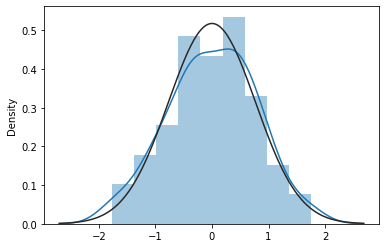

In [ ]:
sns.distplot(model.resid, fit = stats.norm)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


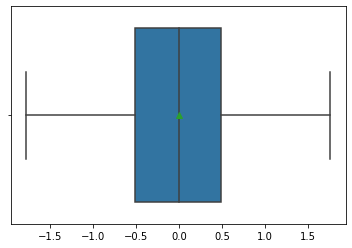

In [ ]:
sns.boxplot(model.resid, showmeans = True)

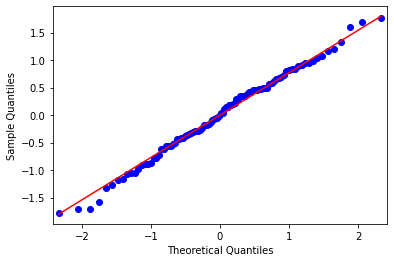

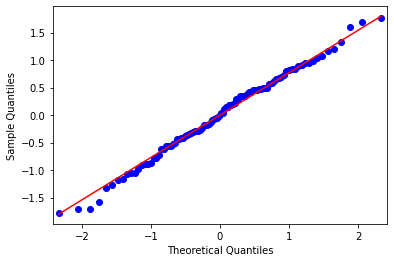

In [ ]:
sm.qqplot(model.resid, line = 's')

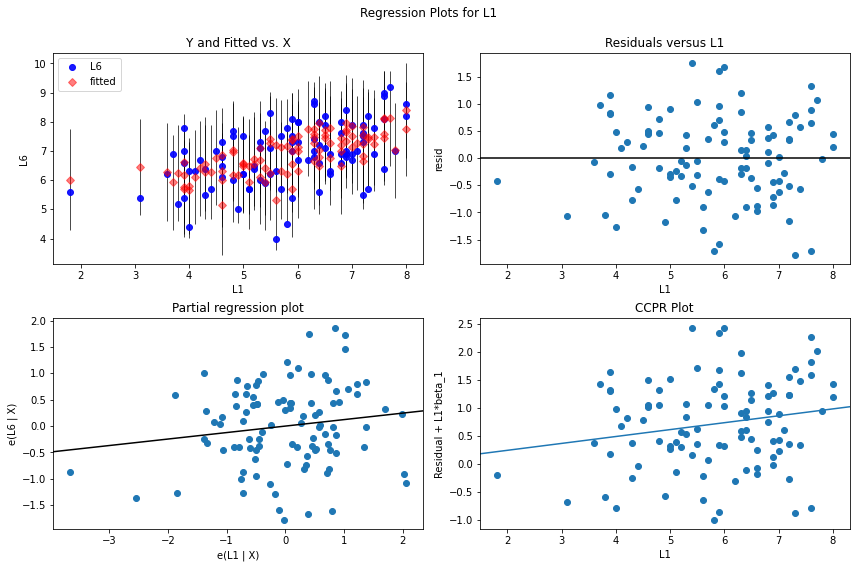

In [ ]:
#8. Kiểm định phương sai phần dư thay đổi
fig = plt.figure(figsize = (12,8))
fig = sm.graphics.plot_regress_exog(model, 'L1', fig = fig)
# Nếu các điểm nằm phân bổ rộng và không sát so với trục giữa thì nó không thay đổi (pass) và ngược lại

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


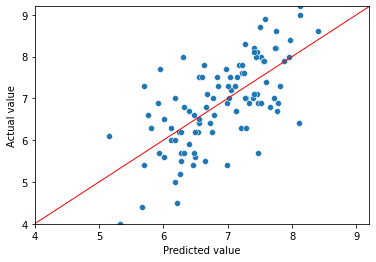

In [ ]:
#Đánh giá mô hình
Y_max = y.max()
Y_min = y.min()

ax = sns.scatterplot(model.fittedvalues, y)
ax.set(ylim = (Y_min, Y_max))
ax.set(xlim = (Y_min, Y_max))

ax.set_xlabel('Predicted value')
ax.set_ylabel('Actual val

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100) #phát s

plt.plot(X_ref, Y_ref, color = 'red', linewidth = 1)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     L6   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     15.20
Date:                Sun, 30 May 2021   Prob (F-statistic):           6.26e-11
Time:                        02:48:13   Log-Likelihood:                -112.26
No. Observations:                 100   AIC:                             236.5
Df Residuals:                      94   BIC:                             252.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.021e-16      0.077  -1.18e-14      1.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


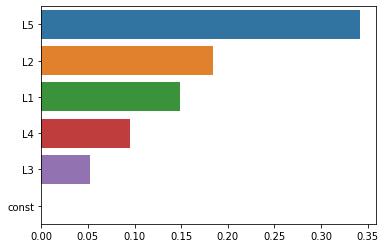

In [ ]:
#10.Tornado (là dạng biểu đồ dùng để đánh giá mức độ tác động các biến số lên mô hình) 
#Standardization
X_norm = pd.DataFrame(stats.zscore(X), columns = X.columns)
X_norm = sm.add_constant(X_norm)

y_norm = pd.Series(stats.zscore(y), name = y.name)
model_stand = sm.OLS(y_norm, X_norm)
model_stand_res = model_stand.fit()
print(model_stand_res.summary())

coeff = model_stand_res.params
coeff = coeff.iloc[(coeff.abs()*(-1.0)).argsort()] #sort data

sns.barplot(coeff.values, coeff.index, orient = 'h')

In [ ]:
#11. Model ( dùng kết quả chưa chuẩn hoá)
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

mod = LinearRegression()
mod.fit(X,y)
coef = pd.concat([pd.Series(X.columns), pd.Series(mod.coef_)], axis = 1)
coef.columns = ['variables', 'cofficient']

print(coef)

  variables  cofficient
0        L1    0.122976
1        L2    0.162455
2        L3    0.042506
3        L4    0.075591
4        L5    0.314004


In [ ]:
sfs = SFS(mod, k_features='best', 
          forward = False, 
          floating = False, 
          scoring = 'r2',
          cv = 30)
sfs = sfs.fit(X,y)

plot_sfs(sfs.get_metric_dict(), kind = 'std_err')
plt.grid()
plt.show()

In [ ]:
number_features = 2
print(sfs.subsets_[number_features].get('feature_names'))